#### Imports: pandas, numpy

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

##### Reading the data from an excel file and getting the first five rows as a measure of check

In [82]:
df = pd.read_excel("/Users/ananyatalukdar/Documents/dataScience_self/spotify user analysis/data/raw/Spotify_data.xlsx")
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [83]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

#### understanding the type of responses

In [84]:
for c in df.columns:
    print(str(df[c].value_counts(dropna=False))+"\n")

Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64

spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   14
Smartphone, Smart speakers or voice assistants                                           10
Smartphone, Wearable devices                                                              8
Smartph

##### to understand if a user might be willing to switch to premium : switch to premium? yes/no -> premium preference/skip. 
##### users who chose no for willingnes, mostly were people who skipped the preference question(203). some still gave their preference. 
##### users who chose yes for willingness, mostly were people on the premium plan or willing to switch. very few(5) skipped preference choice

In [85]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["preffered_premium_plan"],
    dropna=False
)

preffered_premium_plan,Duo plan- Rs 149/month,Family Plan-Rs 179/month,Individual Plan- Rs 119/ month,Student Plan-Rs 59/month,NaN
premium_sub_willingness,,,,,
No,32,13,26,60,203
Yes,52,26,69,34,5


##### willingness to switch as a function of age

In [86]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["Age"],
    dropna=False
)

Age,12-20,20-35,35-60,6-12,60+
premium_sub_willingness,,,,,
No,36,281,14,2,1
Yes,35,141,9,1,0


##### willingness to switch as a function of gender

In [87]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["Gender"],
    dropna=False
)

Gender,Female,Male,Others
premium_sub_willingness,,,
No,255,72,7
Yes,136,42,8


##### willingness to switch as a function of spotify usage period

In [88]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["spotify_usage_period"],
    dropna=False
)

spotify_usage_period,1 year to 2 years,6 months to 1 year,Less than 6 months,More than 2 years
premium_sub_willingness,,,,
No,84,67,76,107
Yes,57,52,15,62


##### willingness to switch as a function of preferred_listening_content

In [89]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["preferred_listening_content"],
    dropna=False
)

preferred_listening_content,Music,Podcast
premium_sub_willingness,,
No,292,42
Yes,118,68


##### willingness to switch as a function of spotify_listening_device

In [90]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["spotify_listening_device"],
    dropna=False
)

spotify_listening_device,Computer or laptop,"Computer or laptop, Smart speakers or voice assistants","Computer or laptop, Smart speakers or voice assistants, Wearable devices","Computer or laptop, Wearable devices",Smart speakers or voice assistants,"Smart speakers or voice assistants, Wearable devices",Smartphone,"Smartphone, Computer or laptop","Smartphone, Computer or laptop, Smart speakers or voice assistants","Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices","Smartphone, Computer or laptop, Wearable devices","Smartphone, Smart speakers or voice assistants","Smartphone, Smart speakers or voice assistants, Wearable devices","Smartphone, Wearable devices",Wearable devices
premium_sub_willingness,,,,,,,,,,,,,,,
No,22,5,2,1,14,1,228,31,3,4,3,6,4,7,3
Yes,32,9,1,4,29,1,72,17,4,4,2,4,1,1,5


##### willingness to switch as a function of music_time_slot

In [91]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["music_time_slot"],
    dropna=False
)

music_time_slot,Afternoon,Morning,Night
premium_sub_willingness,,,
No,59,55,220
Yes,58,36,92


##### willingness to switch as a function of music_lis_frequency 

In [92]:
pd.crosstab(
    df["premium_sub_willingness"],
    df["music_lis_frequency"],
    dropna=False
)

music_lis_frequency,Office hours,"Office hours, Study Hours, While Traveling","Office hours, Study Hours, While Traveling, Workout session","Office hours, Study Hours, While Traveling, Workout session, leisure time","Office hours, Study Hours, While Traveling, Workout session, leisure time,","Office hours, Study Hours, While Traveling, leisure time","Office hours, Study Hours, Workout session","Office hours, While Traveling","Office hours, While Traveling,","Office hours, While Traveling, Workout session",...,"Study Hours, leisure time",While Traveling,"While Traveling, Before bed","While Traveling, Workout session","While Traveling, Workout session, leisure time","While Traveling, Workout session, leisure time, Night time, when cooking","While Traveling, leisure time",Workout session,"Workout session, leisure time",leisure time
premium_sub_willingness,,,,,,,,,,,,,,,,,,,,,
No,9,2,1,3,0,3,1,9,2,7,...,4,72,0,12,27,0,43,18,5,69
Yes,7,5,0,4,1,0,1,3,0,3,...,0,39,1,4,21,1,22,15,1,18


##### copy of df in model_df with certain features and target

In [106]:
features = [
    "Age",
    "Gender",
    "spotify_usage_period",
    "spotify_listening_device",
    "preferred_listening_content",
    "music_time_slot",
    "music_lis_frequency"
]
target = "premium_sub_willingness"
model_df = df[features + [target]].copy()

# for every target in model_df, map yes to 1 and no to 0
model_df[target] = model_df[target].map({"Yes": 1,"No": 0})
# x has input features for the model, y has what we want the model to predict   
X = model_df[features]
y = model_df[target]

# one hot encoding for machine ready data
X_encoded = pd.get_dummies(X, drop_first=True)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


0.7


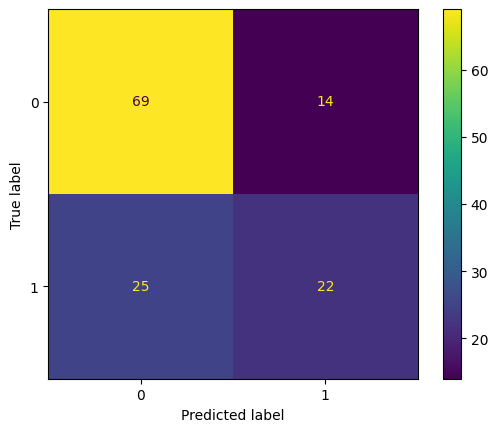

In [104]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [105]:
coef_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
23,preferred_listening_content_Podcast,0.965457
47,"music_lis_frequency_Study Hours, While Traveli...",0.907688
26,"music_lis_frequency_Office hours, Study Hours,...",0.849962
49,"music_lis_frequency_Study Hours, Workout sessi...",0.672123
28,"music_lis_frequency_Office hours, Study Hours,...",0.623932
12,spotify_listening_device_Smart speakers or voi...,0.541952
29,"music_lis_frequency_Office hours, Study Hours,...",0.540496
52,"music_lis_frequency_While Traveling, Before bed",0.539970
43,music_lis_frequency_Study Hours,0.518825
40,"music_lis_frequency_Office hours,Study Hours, ...",0.478352
